In [30]:
!pip install azure-storage-blob

In [31]:
#!pip install azure-storage-blob

import pandas as pd
from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

connection_string = "DefaultEndpointsProtocol=https;AccountName=mloblistorage;AccountKey=u+SGxSxdN+0KtUq2qwRS2zD+Ul4hBnt+nhAzPok53QggOuXa9+5V3VU8NDHiGmG2zN+ghQ7V+AtY+ASt8kPFcA==;EndpointSuffix=core.windows.net"
container_name ="mloblistoragecontainer"
blob_name = "properties_tienda_inglesa.csv"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

data = StringIO(csv_data)
df = pd.read_csv(data, header=None, names=['id','image_urls','images','link','product_name','property_type','source','url'])
#id,image_urls,images,link,product_name,property_type,source,url

valid_categories=["WAREHOUSE",
             "DRINKS",
            "CLEANING",
             "FROZEN",
            "TECHNOLOGY",
             "PERFUMERY"]


In [32]:
df = df_filtrado = df.query('property_type in @valid_categories')
df = df[~df['id'].duplicated()]
df['md5']=''

<ipython-input-32-214b070c72a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['md5']=''


In [33]:
df

,id,image_urls,images,link,product_name,property_type,source,url,md5
0,29465,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Tapas-para-Em...,Tapas para Empanadas Hojaldradas TIENDA INGLES...,WAREHOUSE,tienda_inglesa,https://www.tiendainglesa.com.uy/Tapas-para-Em...,
1,218557,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Galleta-Arroz...,Galleta Arroz CEREALITAS 160 gr,WAREHOUSE,tienda_inglesa,https://www.tiendainglesa.com.uy/Galleta-Arroz...,
3,99775,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Refresco-PASO...,Refresco PASO DE LOS TOROS Pomelo sin Azúcar 1...,DRINKS,tienda_inglesa,https://www.tiendainglesa.com.uy/Refresco-PASO...,
4,86019,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Pizza-con-Muz...,Pizza con Muzzarella y Tomate Pack Familiar SI...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Pizza-con-Muz...,
5,57950,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Papel-Higieni...,Papel Higiénico HIGIENOL Doble Hoja Premium 4 ...,FROZEN,tienda_inglesa,https://www.tiendainglesa.com.uy/Papel-Higieni...,
...,...,...,...,...,...,...,...,...,...
25736,108410,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Calefon-JAMES...,Calefón JAMES 60 L,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Calefon-JAMES...,
25737,301502,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Resma-de-Pape...,Resma de Papel para Impresora FANACOPY A4 75 gr,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Resma-de-Pape...,
25738,461922,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Lavarropa-JAM...,Lavarropa JAMES Carga Frontal Blanco Display L...,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Lavarropa-JAM...,
25739,536075,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Aire-Acondici...,Aire Acondicionado ECOSYSTEM 12000 BTU Inverte...,TECHNOLOGY,tienda_inglesa,https://www.tiendainglesa.com.uy/Aire-Acondici...,


In [34]:
def get_image_from_blob(blob_client):
    stream = io.BytesIO()
    download_stream = blob_client.download_blob()
    stream.write(download_stream.readall())

    stream.seek(0)
    image = Image.open(stream)
    return image

In [35]:
def calcular_md5(imagen):
    md5_hash = hashlib.md5(imagen).hexdigest()
    return md5_hash

In [36]:
def show_image(blob_client):

    image = get_image_from_blob(blob_client)

    plt.imshow(image)
    plt.show()


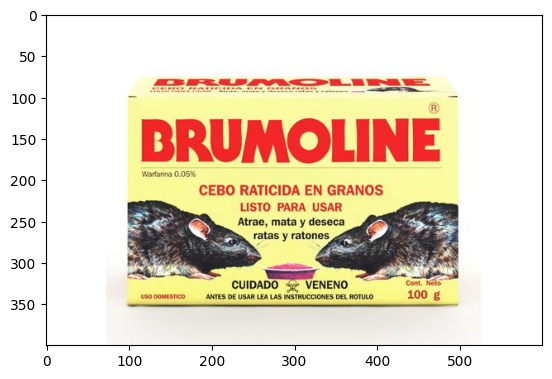

In [37]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt

try:
    blob_service_client = BlobServiceClient.from_connection_string(connection_string)
    blob_name = 'full/0094e2445afde938bd97477f21149e43101f1ebf.jpg'
    blob_client = blob_service_client.get_blob_client(container_name, blob_name)

    show_image(blob_client)

except Exception as ex:
    print('Exception:')
    print(ex)

In [38]:
IMAGE_SIZE=32

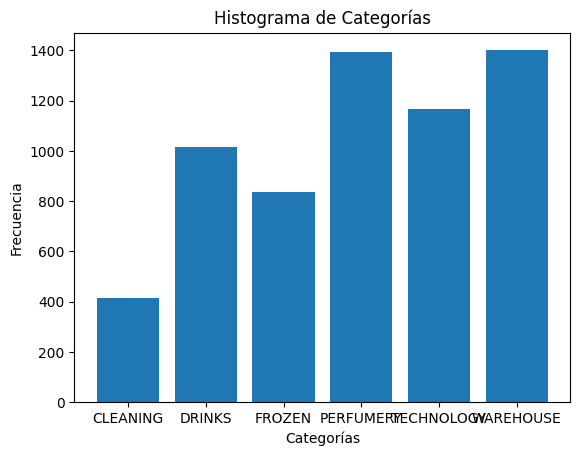

In [39]:
import numpy as np
categories=df['property_type'].values

conteo_categorias = np.unique(categories, return_counts=True)

categorias_unicas = conteo_categorias[0]
conteos = conteo_categorias[1]

plt.bar(categorias_unicas, conteos)

plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Histograma de Categorías')

plt.show()

In [40]:
import ast
import hashlib

image_ids=[]
images =[]
categories=[]
count=1;
for index, row in df.iterrows():
    lista_json = row['images']
    b=ast.literal_eval(lista_json[1:-1])
    path =  b.get("path")

    blob_client = blob_service_client.get_blob_client(container_name, path)
    imagen=get_image_from_blob(blob_client).resize((IMAGE_SIZE,IMAGE_SIZE))
    md5=calcular_md5(imagen.tobytes())
    if(md5 not in df['md5'].values):
      images.append(imagen)
      df.at[index,'md5'] = md5

      image_ids.append(row['id'])
      categories.append(row['property_type'])
      if count%100==0:
        print(f"Load {count} images of {df.shape[0]}")
      count+=1



Load 100 images of 6229
Load 200 images of 6229
Load 300 images of 6229
Load 400 images of 6229
Load 500 images of 6229
Load 600 images of 6229
Load 700 images of 6229
Load 800 images of 6229
Load 900 images of 6229
Load 1000 images of 6229
Load 1100 images of 6229
Load 1200 images of 6229
Load 1300 images of 6229
Load 1400 images of 6229
Load 1500 images of 6229
Load 1600 images of 6229
Load 1700 images of 6229
Load 1800 images of 6229
Load 1900 images of 6229
Load 2000 images of 6229
Load 2100 images of 6229
Load 2200 images of 6229
Load 2300 images of 6229
Load 2400 images of 6229
Load 2500 images of 6229
Load 2600 images of 6229
Load 2700 images of 6229
Load 2800 images of 6229
Load 2900 images of 6229
Load 3000 images of 6229
Load 3100 images of 6229
Load 3200 images of 6229
Load 3300 images of 6229
Load 3400 images of 6229
Load 3500 images of 6229
Load 3600 images of 6229
Load 3700 images of 6229
Load 3800 images of 6229
Load 3900 images of 6229
Load 4000 images of 6229
Load 4100

In [41]:
images_backup=images


In [42]:
images=[(np.array(imagen_pil)) for imagen_pil in images]
#images=images_backup

In [43]:
lista_np = []
for imagen_np in images:
    lista_np.append(imagen_np)
images=np.array(lista_np)

In [44]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
def plot_metric(history,target, title):
    plt.plot(history.history[target])
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(target)
    plt.show()


def plot_fit(history):
    local_metrics=['loss','accuracy','f1_m',keras.metrics.precition,'recall_m']
    for x in local_metrics:
      plot_metric(history,x,f"{x} en train")


In [47]:
#augmentation
data_augmentation = Sequential([
    preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    preprocessing.Rescaling(1./255),
    preprocessing.RandomRotation(0.15),
    preprocessing.RandomFlip("vertical"),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomTranslation(0.1, 0.1),
    preprocessing.RandomContrast(0.3),
])


In [58]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from keras.optimizers import Adam

num_categorias = len(np.unique(categories))



categorias_encoded, categorias_mapping = np.unique(categories, return_inverse=True)
print(categorias_encoded)
categorias_encoded = to_categorical(categorias_mapping, num_categorias)
print(categorias_encoded)



imagenes_train, imagenes_test, categorias_train, categorias_test = train_test_split(
    images, categorias_encoded, test_size=0.2, random_state=42)



model = Sequential()
model.add(data_augmentation)
#model.add(Reshape((-1,IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_categorias, activation='softmax'))
opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

fitted = model.fit(imagenes_train, categorias_train, epochs=30, validation_split=0.2, batch_size=64)

model.save('model1.h5')


['CLEANING' 'DRINKS' 'FROZEN' 'PERFUMERY' 'TECHNOLOGY' 'WAREHOUSE']
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


ValueError: ignored

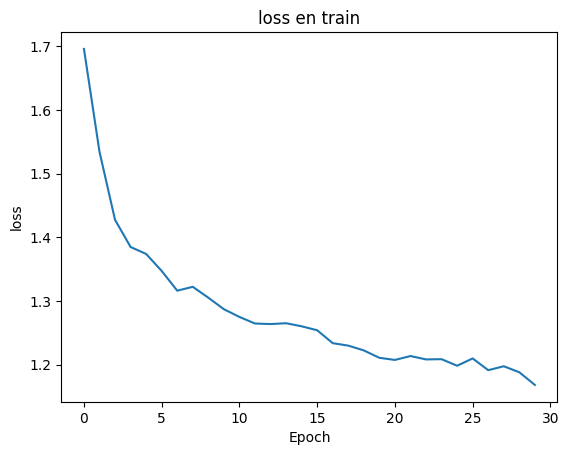

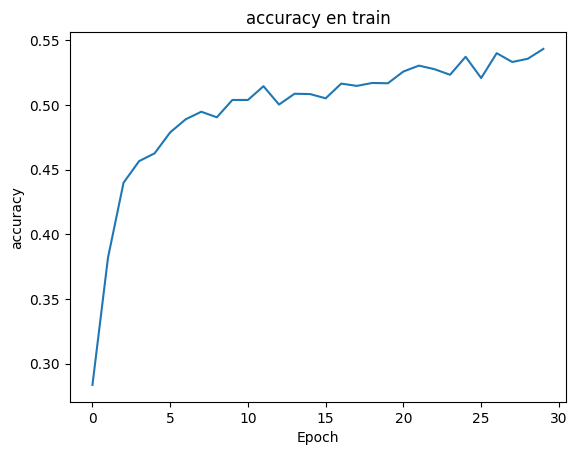

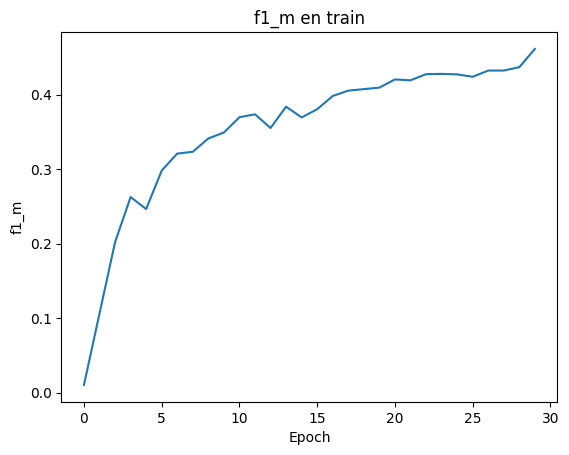

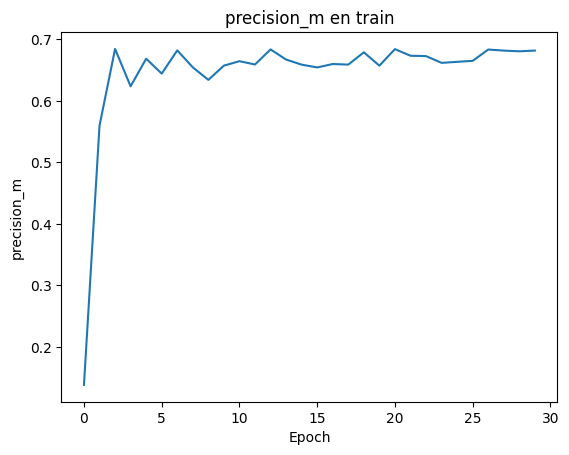

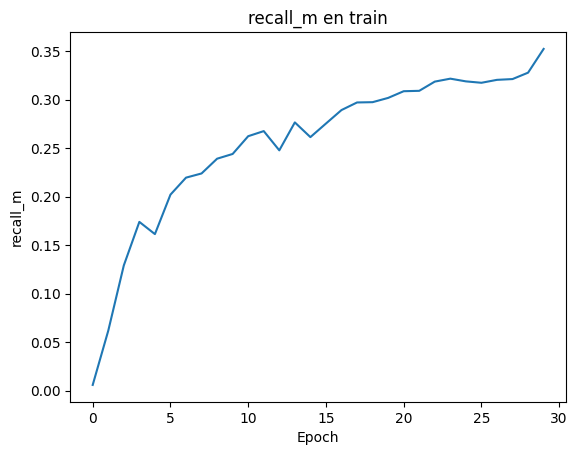

In [50]:

plot_fit(fitted)


In [51]:
loss, accuracy,f1,precision,recall = model.evaluate(imagenes_test, categorias_test)
print(f"Loss en el conjunto de prueba: {loss}")
print(f"F1-Score en el conjunto de prueba: {f1}")
print(f"Precision en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")

print(f"Accuracy en el conjunto de prueba: {accuracy}")

predicciones = model.predict(imagenes_test)

39/39 [==============================] - 1s 32ms/step - loss: 1.2980 - accuracy: 0.4951 - f1_m: 0.4135 - precision_m: 0.6313 - recall_m: 0.3106
Loss en el conjunto de prueba: 1.297964096069336
F1-Score en el conjunto de prueba: 0.41347795724868774
Precision en el conjunto de prueba: 0.63133305311203
Recall en el conjunto de prueba: 0.3105769157409668
Accuracy en el conjunto de prueba: 0.49514561891555786
39/39 [==============================] - 2s 28ms/step


In [53]:
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
model = Sequential()
model.add(data_augmentation)
#model.add(Reshape((-1,IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_categorias, activation='softmax'))  # Suponiendo 10 categorías

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

fitted = model.fit(imagenes_train, categorias_train, epochs=10, validation_split=0.2, batch_size=64)

model.save('model1_transfer_learning.h5')




Epoch 1/10
62/62 [==============================] - 474s 8s/step - loss: 1.7716 - accuracy: 0.2150 - f1_m: 0.0030 - precision_m: 0.0030 - recall_m: 0.0030 - val_loss: 1.7078 - val_accuracy: 0.2437 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
62/62 [==============================] - 480s 8s/step - loss: 1.6062 - accuracy: 0.3284 - f1_m: 0.0543 - precision_m: 0.1708 - recall_m: 0.0343 - val_loss: 1.6027 - val_accuracy: 0.3579 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/10
62/62 [==============================] - 480s 8s/step - loss: 1.5427 - accuracy: 0.3486 - f1_m: 0.1178 - precision_m: 0.5086 - recall_m: 0.0710 - val_loss: 1.5379 - val_accuracy: 0.3731 - val_f1_m: 0.2132 - val_precision_m: 0.5870 - val_recall_m: 0.1323
Epoch 4/10
62/62 [==============================] - 482s 8s/step - loss: 1.5225 - accuracy: 0.3784 - f1_m: 0.1283 - precision_m: 0.5225 - recall_m: 0.0755 - val_loss: 1.5314 - val_a

KeyboardInterrupt: ignored

In [ ]:
plot_fit(fitted)


In [ ]:
loss, accuracy,f1,precision,recall = model.evaluate(imagenes_test, categorias_test)
print(f"Loss en el conjunto de prueba: {loss}")
print(f"F1-Score en el conjunto de prueba: {f1}")
print(f"Precision en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")

print(f"Accuracy en el conjunto de prueba: {accuracy}")

predicciones = model.predict(imagenes_test)

1) hash
2) tf.update/tf.transform para versuones
3) metricas en los mdoelos
